<a href="https://colab.research.google.com/github/giuliasaccomano/giuliasaccomano/blob/main/ISAIT22_CovidData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid Data
An example to show how to access **online data series** and do some analysis.


Help:

* To execute the notebook just push the black triangular button on the upper left corner of each cell. Do not care about the warning :-)
* To save the notebook in your gdrive: `File->Save a copy in Drive`


# Data source
Official data about covid pandemic is available in a github repository as *csv* file (comma separated value):
https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv

# Goal

With few lines of code we will access a data series available online and we will create timeline plots about the number of people hospitalized or admitted to intensive care. 



## Step 1
In the first cell we will import the needed python modules. Executing this cell your own virtual machine is created and started. 


In [ ]:
# Import the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 2
We now use the **pandas** python module to download the data series.

In [ ]:
# Load covid data from "protezione civile"
url="https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df=pd.read_csv(url, parse_dates=[0])

## Step 3
Now the data is available as a **DataFrame** object named **df**. It is a sort of spreadsheet under steroids. For example we can show the fields or pretty print the table. .

In [ ]:
# Show the column names
df.columns

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido'],
      dtype='object')

In [ ]:
# Pretty print the table (head and tail)
df

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,2022-09-10 17:00:00,ITA,3936,173,4109,480830,484939,-17872,15565,21374603,...,243853373,63461191.0,NaN,13.0,NaN,NaN,9272232.0,12763485.0,96374450.0,147478923.0
930,2022-09-11 17:00:00,ITA,3923,180,4103,467746,471849,-13090,12317,21399974,...,243962017,63486175.0,NaN,20.0,NaN,NaN,9273624.0,12774408.0,96397985.0,147564032.0
931,2022-09-12 17:00:00,ITA,3989,176,4165,458504,462669,-9180,6415,21415532,...,244019536,63500331.0,NaN,6.0,NaN,NaN,9273910.0,12780533.0,96412275.0,147607261.0
932,2022-09-13 17:00:00,ITA,3868,163,4031,450004,454035,-8634,23161,21447231,...,244203747,63538609.0,NaN,10.0,NaN,NaN,9277176.0,12800425.0,96450183.0,147753564.0


## Step 4
Now we can plot the time series using the **matplotlib** interface, that is integrated in *DataFrame* objects. We will plot on a log scale:
* Number of hospitalized people (column=*totale_ospedalizzati*)
* Number of hospedalized people admitted to intensive care (column=*terapia_intensiva*) 

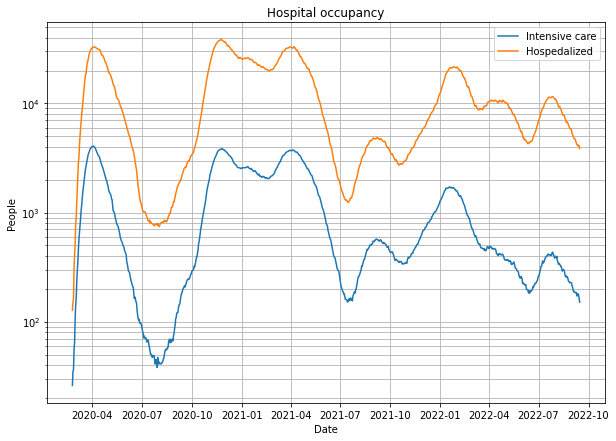

In [ ]:
# We creare a canvas of a given dimension
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# We plot two data series
ax1.plot(df.data, df.terapia_intensiva, label="Intensive care")
ax1.plot(df.data, df.totale_ospedalizzati, label="Hospedalized")

# We add title, axis names and legend
plt.title("Hospital occupancy")
plt.xlabel("Date")
plt.ylabel("People")
plt.legend()

# We set grid and log scale
plt.grid(which="both")
plt.yscale("log")

# We call the plot function
plt.show()

## Step 6
Let's try to plot the daily covid deaths. This is useful to show some of the pandas data manipulation functions. 

Since we have only the cumulative value (*deceduti*), we need to calculate the difference wrt the previous day. This can be done simply via the *diff()* method: it returns a new array where the entries are the differences between consecutive values of the input array.

```
df.deceduti.diff()
```

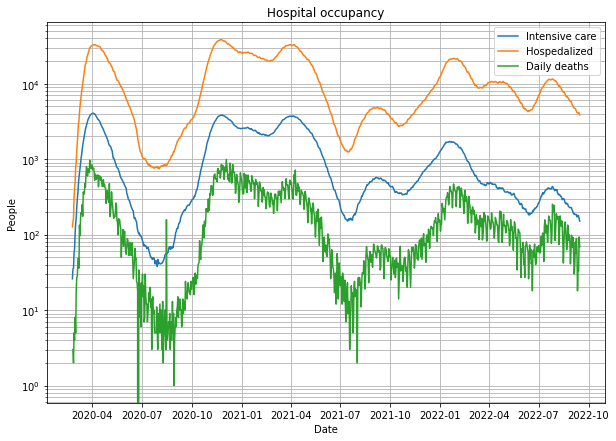

In [ ]:
# We creare a canvas of a given dimension
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# We plot two data series
ax1.plot(df.data, df.terapia_intensiva, label="Intensive care")
ax1.plot(df.data, df.totale_ospedalizzati, label="Hospedalized")

## Adding the 3rd data series
ax1.plot(df.data, df.deceduti.diff(), label="Daily deaths")

# We add title, axis names and legend
plt.title("Hospital occupancy")
plt.xlabel("Date")
plt.ylabel("People")
plt.legend()

# We set grid and log scale
plt.grid(which="both")
plt.yscale("log")

# We call the plot function
plt.show()


But this last data series is characterized by huge fluctuations. We can remove the **noise** taking the rollong average over 7 days. This can be easily done via the methods *rolling()* and *mean()*:
```
df.deceduti.diff().rolling(7).mean()
```  
This returns a new array that contains the mean values calculated over a rolling window of 7 days.

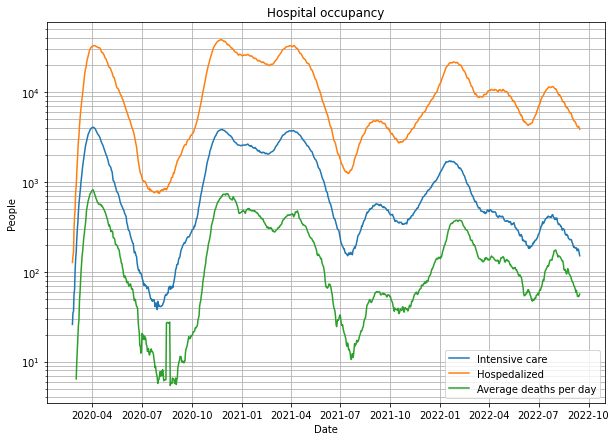

In [ ]:
# We creare a canvas of a given dimension
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# We plot two data series
ax1.plot(df.data, df.terapia_intensiva, label="Intensive care")
ax1.plot(df.data, df.totale_ospedalizzati, label="Hospedalized")

## Adding the 3rd data series
ax1.plot(df.data, df.deceduti.diff().rolling(7).mean(), label="Average deaths per day")

# We add title, axis names and legend
plt.title("Hospital occupancy")
plt.xlabel("Date")
plt.ylabel("People")
plt.legend()

# We set grid and log scale
plt.grid(which="both")
plt.yscale("log")

# We call the plot function
plt.show()